In [58]:
import os
import numpy as np
import pandas as pd

In [59]:
result_dir = "./test_homo_template/eva_results3"
csv_dir = os.path.join(result_dir, "results")

In [60]:
native_composite_scores = []
native_tmscore_out = []
homo_composite_scores = []
homo_tmscore_out = []
for csv_ in os.listdir(csv_dir):
    data = pd.read_csv(os.path.join(csv_dir,csv_))
    data['composite_score'] = data['tm_diff'] * data['plddt'] * data['ptm']
    # tmscore_out = float(data['tm_out'])

    native_composite_scores.append(float(data['composite_score'][0]))
    native_tmscore_out.append(float(data['tm_out'][0]))
    
    homo_composite_scores.append(float(data['composite_score'][1]))
    homo_tmscore_out.append(float(data['tm_out'][1]))

print("native_composite_scores:")
print(native_composite_scores)
print("native_tmscore_out:")
print(native_tmscore_out)


native_composite_scores:
[72.97053029275013, 74.44005612881226, 78.54577796548479, 55.676389657785045, 72.00555887238319, 86.49370781909819, 54.74693044011379, 69.79075964289812, 52.36343305281889, 75.83128047759406, 58.33159784146501, 67.67950134721305, 75.5814193820844, 81.4722840942696, 76.81503844073212, 62.53584731994477, 54.42107969217897, 81.9239064552143, 76.38076034043223, 81.18472166913064, 61.31115791633968, 81.29275414049562, 42.89020256236745, 65.73800396825054, 56.92492462614066, 51.165750155664156, 65.8861132634395, 53.84720524183243, 69.32637247650423, 56.50337748268219, 86.92074351332538, 69.24010109246822]
native_tmscore_out:
[0.92514, 0.97363, 0.95809, 0.92923, 0.95606, 0.99239, 0.95725, 0.95119, 0.8876, 0.94645, 0.88216, 0.9591, 0.97378, 0.98372, 0.96267, 0.93719, 0.9061, 0.98221, 0.97131, 0.98132, 0.96554, 0.96775, 0.76897, 0.96746, 0.94564, 0.83602, 0.96657, 0.94082, 0.96434, 0.94967, 0.98981, 0.96615]


In [61]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 15})
rcParams.update({'font.weight': 'bold'})

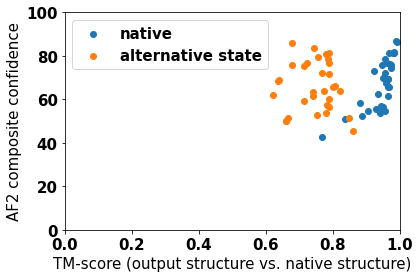

In [62]:
fig, ax = plt.subplots()
ax.scatter(native_tmscore_out, native_composite_scores, label='native')
ax.scatter(homo_tmscore_out, homo_composite_scores, label='alternative state')
ax.legend()

ax.set_xlim(0,1)
ax.set_ylim(0,100)
ax.set_xlabel("TM-score (output structure vs. native structure)")
ax.set_ylabel("AF2 composite confidence")
plt.savefig("tmscore_confidence.png", dpi=300, bbox_inches='tight')

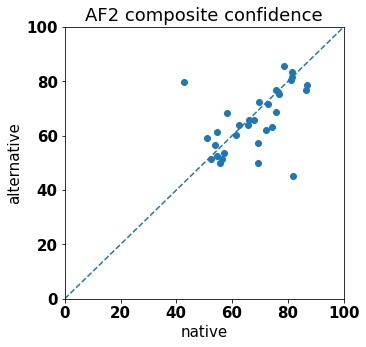

In [63]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax.scatter(native_composite_scores, homo_composite_scores)
ax.axline((0, 0), slope=1, ls='--')

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_xlabel("native")
ax.set_ylabel("alternative")
ax.set_title("AF2 composite confidence")
plt.savefig("confidence_native_alternative.png", dpi=300, bbox_inches='tight')

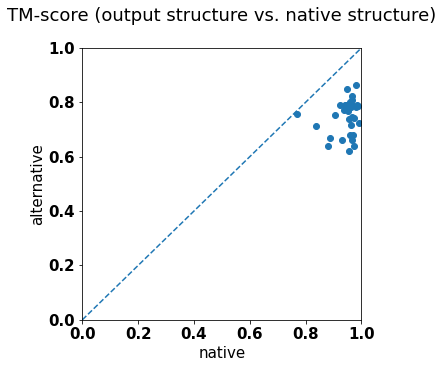

In [64]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax.scatter(native_tmscore_out, homo_tmscore_out)
ax.axline((0, 0), slope=1, ls='--')

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_title("TM-score (output structure vs. native structure)\n")
ax.set_xlabel("native")
ax.set_ylabel("alternative")
plt.savefig("tmscore_native_alternative.png", dpi=300, bbox_inches='tight')